In [2]:
import pandas as pd
import time
import multiprocessing
import matplotlib as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import holt_modeling as hm
from multiprocessing import Pool
%reload_ext autoreload
%autoreload 2

In [3]:
df = pd.read_pickle('community_hour.pickle')

# gather all areas in df
areas = df.pickup_community_area.unique()

# create hourly timeframe for the entire df
# to make sure there are no missing values
# in modeling
daterange = pd.date_range(df['date_time'].iloc[0],
                          df['date_time'].iloc[-1],
                          freq='h')

In [4]:
%%time

# set the model variables for the iterations
iterable = [(df, daterange, area, 20, 15) for area in areas]

# load the model
test = hm.run_area_test

# run one model for each computer processor
if __name__ == '__main__':
    with Pool() as pool:
        predictions = pool.starmap(test, iterable)
    pool.close()

Starting with area: 1
Starting with area: 12
Starting with area: 15
Starting with area: 18
Starting with area: 20
Starting with area: 23
Starting with area: 26
Starting with area: 29
Done with area: 29
Starting with area: 3
Done with area: 26
Starting with area: 27
Done with area: 15
Starting with area: 16
Done with area: 18
Starting with area: 19
Done with area: 20
Starting with area: 21
Done with area: 12
Starting with area: 13
Done with area: 23
Starting with area: 24
Done with area: 1
Starting with area: 10
Done with area: 27
Starting with area: 28
Done with area: 3
Starting with area: 30
Done with area: 16
Starting with area: 17
Done with area: 19
Starting with area: 2
Done with area: 21
Starting with area: 22
Done with area: 13
Starting with area: 14
Done with area: 30
Starting with area: 31
Done with area: 2
Starting with area: 34
Done with area: 10
Starting with area: 11
Done with area: 17
Starting with area: 37
Done with area: 24
Starting with area: 25
Done with area: 34
Start

In [16]:
print(f'average train rmse: {np.array([x["val_rmse"] for x in predictions]).mean()}')
print(f'average test rmse: {np.array([x["test_rmse"] for x in predictions]).mean()}')

average train rmse: 33.64997095214938
average test rmse: 25.590393566003208


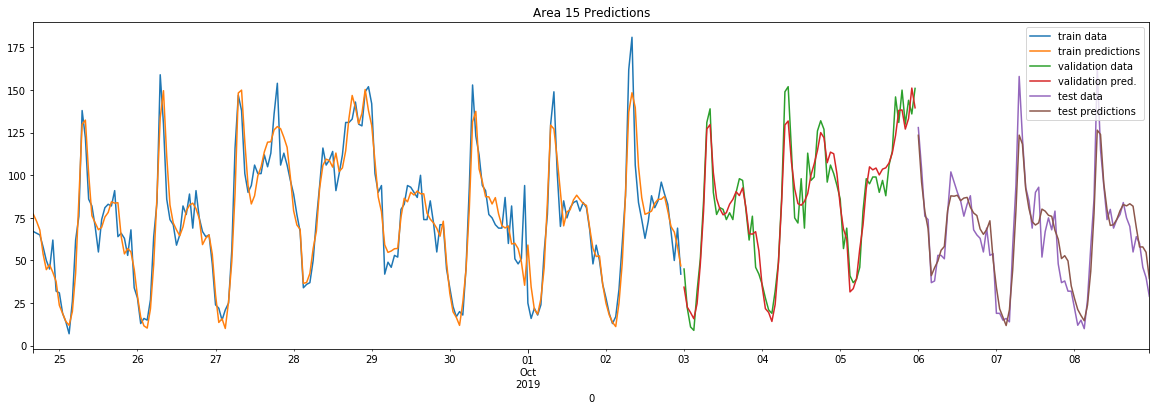

In [37]:
hm.plot_predictions(predictions[6])

In [13]:
pd.DataFrame(predictions).sort_values('area')

,train,train_pred,validate,val_forecast,test,test_forecast,val_rmse,test_rmse,area,time
0,0 2018-11-01 00:00:00 74.0 2018-11-01 01:0...,0 2018-11-01 00:00:00 74.886028 2018-11-01...,0 2019-10-03 00:00:00 76.0 2019-10-03 01:0...,2019-10-03 00:00:00 90.889004 2019-10-03 0...,0 2019-10-06 00:00:00 209.0 2019-10-06 01:0...,2019-10-06 00:00:00 221.361079 2019-10-06 0...,32.616946,44.762585,1,171.012237
11,0 2018-11-01 00:00:00 33.0 2018-11-01 01:00...,0 2018-11-01 00:00:00 38.904703 2018-11-01 ...,0 2019-10-03 00:00:00 42.0 2019-10-03 01:0...,2019-10-03 00:00:00 25.923651 2019-10-03 0...,0 2019-10-06 00:00:00 167.0 2019-10-06 01:0...,2019-10-06 00:00:00 90.833503 2019-10-06 01...,16.853583,16.333077,2,81.370524
22,0 2018-11-01 00:00:00 221.0 2018-11-01 01:0...,0 2018-11-01 00:00:00 161.623938 2018-11-01...,0 2019-10-03 00:00:00 111.0 2019-10-03 01:0...,2019-10-03 00:00:00 62.450367 2019-10-03 0...,0 2019-10-06 00:00:00 512.0 2019-10-06 01:0...,2019-10-06 00:00:00 478.866974 2019-10-06 0...,51.142557,40.012842,3,119.215827
33,0 2018-11-01 00:00:00 61.0 2018-11-01 01:0...,0 2018-11-01 00:00:00 62.170933 2018-11-01...,0 2019-10-03 00:00:00 59.0 2019-10-03 01:0...,2019-10-03 00:00:00 61.304080 2019-10-03 0...,0 2019-10-06 00:00:00 228.0 2019-10-06 01:0...,2019-10-06 00:00:00 246.925308 2019-10-06 0...,33.186015,22.951378,4,104.564297
43,0 2018-11-01 00:00:00 87.0 2018-11-01 01:0...,0 2018-11-01 00:00:00 77.282127 2018-11-01...,0 2019-10-03 00:00:00 67.0 2019-10-03 01:0...,2019-10-03 00:00:00 76.195520 2019-10-03 0...,0 2019-10-06 00:00:00 277.0 2019-10-06 01:0...,2019-10-06 00:00:00 346.593802 2019-10-06 0...,22.739878,23.627803,5,121.755131
...,...,...,...,...,...,...,...,...,...,...
68,0 2018-11-01 00:00:00 9.0 2018-11-01 01:00...,0 2018-11-01 00:00:00 8.907490 2018-11-01 ...,0 2019-10-03 00:00:00 13.0 2019-10-03 01:00...,2019-10-03 00:00:00 14.316023 2019-10-03 01...,0 2019-10-06 00:00:00 18.0 2019-10-06 01:00...,2019-10-06 00:00:00 27.205882 2019-10-06 01...,7.135716,6.426051,73,80.418943
69,0 2018-11-01 00:00:00 12.0 2018-11-01 01:00...,0 2018-11-01 00:00:00 7.679739 2018-11-01 ...,0 2019-10-03 00:00:00 4.0 2019-10-03 01:00...,2019-10-03 00:00:00 4.664760 2019-10-03 01...,0 2019-10-06 00:00:00 44.0 2019-10-06 01:00...,2019-10-06 00:00:00 36.467890 2019-10-06 01...,6.637790,5.013290,74,119.313236
70,0 2018-11-01 00:00:00 16.0 2018-11-01 01:00...,0 2018-11-01 00:00:00 10.539380 2018-11-01 ...,0 2019-10-03 00:00:00 7.0 2019-10-03 01:00...,2019-10-03 00:00:00 5.786728 2019-10-03 01...,0 2019-10-06 00:00:00 54.0 2019-10-06 01:00...,2019-10-06 00:00:00 24.749413 2019-10-06 01...,6.239761,6.916679,75,118.237587
71,0 2018-11-01 00:00:00 168.0 2018-11-01 01:...,0 2018-11-01 00:00:00 347.926852 2018-11-0...,0 2019-10-03 00:00:00 486.0 2019-10-03 01:0...,2019-10-03 00:00:00 486.962312 2019-10-03 0...,0 2019-10-06 00:00:00 176.0 2019-10-06 01:0...,2019-10-06 00:00:00 276.133675 2019-10-06 0...,124.633578,133.021726,76,139.156375


In [41]:
pd.DataFrame(train).to_pickle('area_predictions.pickle')